# Analisis Prediktif : <span style="font-weight:normal">Prediksi Diabetes</span>
---

Proyek Submission 1 - Machine Learning Terapan

Oleh : Marwan Hadid

# Pendahuluan

Pada Proyek ini, saya mengambil dataset dengan tema kesehatan. Masalah yang diambil pada tema ini adalah penyakit diabetes. Pada dataset ini, model akan mengeksplorasi hubungan terhadap beberapa indikator kesehatan serta kemungkinan diabetes. Indikator-indikator tersebut berupa, banyak kali hamil, konsentrasi plasma glukosa selama 2 jam pada tes toleransi glukosa, tekanan darah diastolik, ketebalan kulit, indeks massa tubuh, skor genetik diabetes, dan umur. Model yang telah dikembangkan nantinya diharapkan dapat memprediksi penyakit diabetes berdasarkan indikator yang ada.

# Mengimport Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Data Wrangling

## Membaca Dataset

In [2]:
file = 'Healthcare_Diabetes.csv'
df = pd.read_csv(file)
df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


- Terdapat sejumlah 2768 _entry_ pada dataset
- Data memiliki 10 kolom

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


Penjelasan Fitur:
- **Id**: Penomoran unik untuk tiap data.
- **Pregnancies**: Banyak kali hamil.
- **Glucose**: Konsentrasi plasma glukosa selama 2 jam dalam tes toleransi glukosa.
- **BloodPressure**: Tekanan darah diastolik (mm Hg).
- **SkinThickness**: Ketebalan lapisan kulit trisep (mm).
- **Insulin**: Insulin serum 2 jam (mu U/ml).
- **BMI**: _Body mass index_ atau indeks massa tubuh (berat badan dalam kg / tinggi badan dalam m^2).
- **DiabetesPedigreeFunction**: Fungsi silsilah diabetes, skor genetik diabetes.
- **Age**: Umur dalam satuan tahun.
- **Outcome**: Klasifikasi yang biner menentukan ada (1) atau tidak adanya (0) diabetes.

Fitur-fitur pada dataset semuanya berupa numerik yang terdiri dari 2 kolom bertipe float64 dan 8 kolom bertipe int64

In [4]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Id,2768.0,1384.500000,799.197097,1.000,692.750,1384.500,2076.250,2768.00
Pregnancies,2768.0,3.742775,3.323801,0.000,1.000,3.000,6.000,17.00
Glucose,2768.0,121.102601,32.036508,0.000,99.000,117.000,141.000,199.00
BloodPressure,2768.0,69.134393,19.231438,0.000,62.000,72.000,80.000,122.00
SkinThickness,2768.0,20.824422,16.059596,0.000,0.000,23.000,32.000,110.00
Insulin,2768.0,80.127890,112.301933,0.000,0.000,37.000,130.000,846.00
BMI,2768.0,32.137392,8.076127,0.000,27.300,32.200,36.625,80.60
DiabetesPedigreeFunction,2768.0,0.471193,0.325669,0.078,0.244,0.375,0.624,2.42
Age,2768.0,33.132225,11.777230,21.000,24.000,29.000,40.000,81.00
Outcome,2768.0,0.343931,0.475104,0.000,0.000,0.000,1.000,1.00


Penjelasan :
- Dataset hanya memiliki fitur numerik.
- Age berkisar dari 21 hingga 81 tahun.
- Terdapat anomali pada fitur Insulin, BMI, BloodPressure, SkinThickness karena nilai minimumnya 0.

## Membersihkan Dataset

In [5]:
# Mengecek nilai pada suatu data yang berisi N/A atau Null

df.isna().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Tidak terdapat _missing value_ pada data

In [6]:
# Mengecek jika ada duplikasi pada data

print('Jumlah duplikasi : ', df.duplicated().sum())

Jumlah duplikasi :  0


In [7]:
# Menghapus kolom 'Id' karena tidak berpengaruh terhadap data

df.drop(['Id'], axis=1, inplace=True)

# EDA

## Univariate Analysis

In [8]:
# List fitur pada dataset kecuali outcome
fitur = [col for col in df.columns if col != 'Outcome']
fitur

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

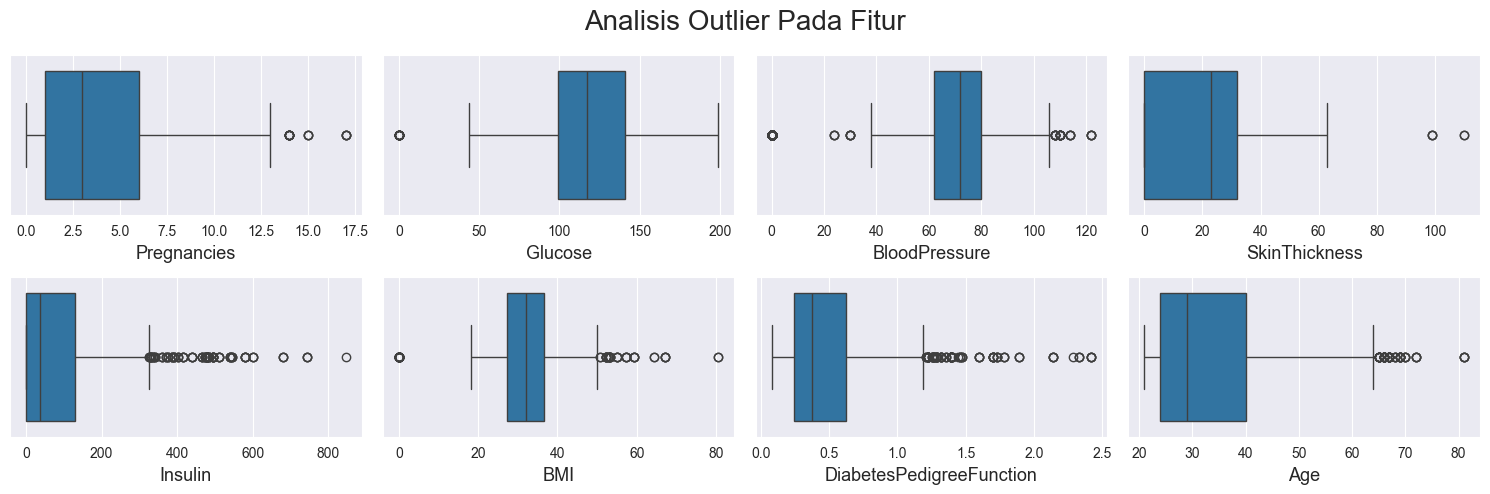

In [9]:
# Analisis Outlier

plt.figure(figsize=(15,5))
plt.suptitle('Analisis Outlier Pada Fitur', fontsize=20)
for i, col in enumerate(fitur, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(df, x=col)
    plt.xlabel(col, fontsize=13)

plt.tight_layout()
plt.show()

- Semua fitur memiliki outlier.
- Fitur Age memiliki beberapa outlier untuk nilai diatas 60.
- Fitur Glucose, BloodPressure, BMI memiliki anomali pada data yang bernilai 0.
- Fitur Insulin dan DiabetesPedigreeFunction memiliki banyak outlier.

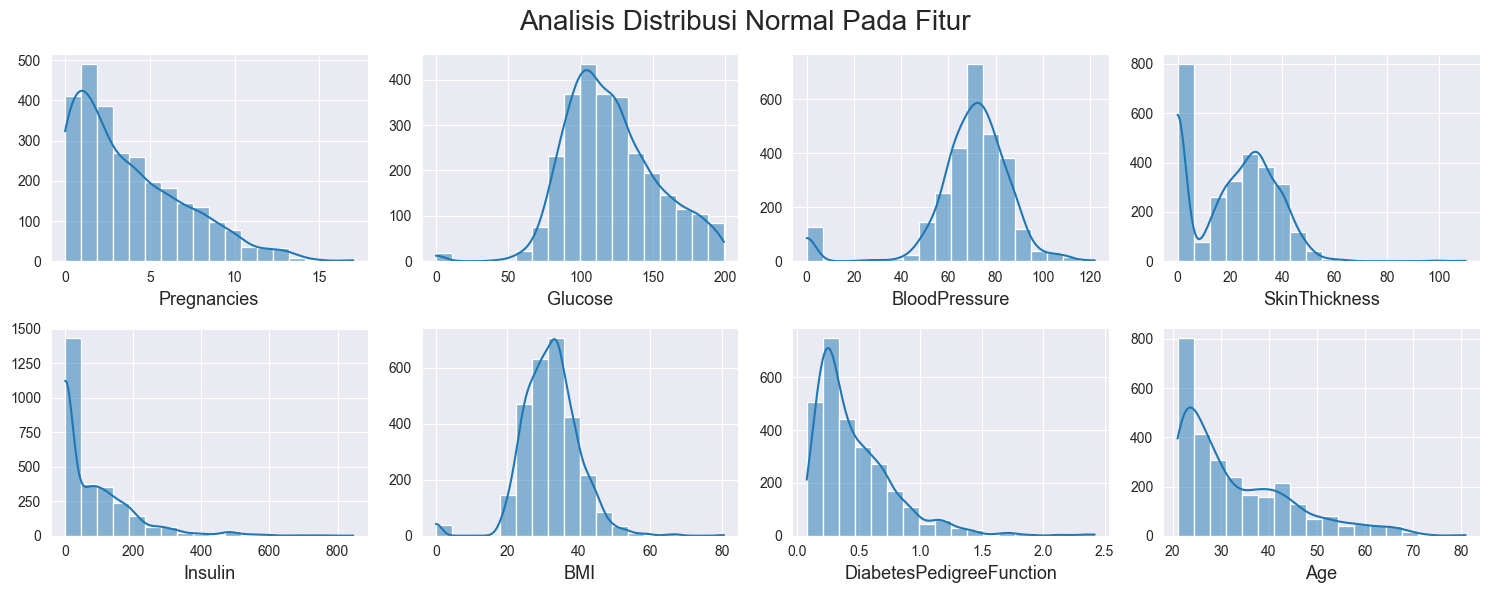

In [10]:
plt.figure(figsize=(15,6))
plt.suptitle('Analisis Distribusi Normal Pada Fitur', fontsize=20)
for i, col in enumerate(fitur, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df, x=col, kde=True, bins=18)
    plt.xlabel(col, fontsize=13)
    plt.ylabel('')

plt.tight_layout()
plt.show()

Distribusi data kebanyakan tidak normal. Hanya fitur Glucose dan BloodPressure yang terlihat memiliki distribusi normal meskipun terdapat outlier dinilai 0 pada kedua fitur. Sedangkan fitur lainnya cenderung _right-skewed_. Data 0 pada Glucose dan BloodPressure akan di _drop_. Kemudian fitur akan distandarisasi menggunakan _StandardScaler_ sebelum digunakan untuk melatih model.

In [11]:
# Menangani anomali dengan cara menghapus data yang bernilai 0
def drop_anomaly(df):
    anomali = ['Glucose', 'BloodPressure', 'BMI']
    q1 = df[anomali].quantile(0.25)
    q3 = df[anomali].quantile(0.75)
    iqr = q3 - q1

    # Hanya perlu menghilangkan bagian bawah yang bernilai 0
    min = q1 - (iqr * 1.5)

    lower_array = np.where(df[anomali] <= min)[0]

    df.drop(index=lower_array, inplace=True)

    return df

df = drop_anomaly(df)
df.shape

(2604, 9)

Data pada kolom Glucose, BloodPressure, dan BMI yang berada bawah kuartil bawah yaitu diangka 0 telah dihapus sehingga menyisakan data sebanyak 2604 baris.

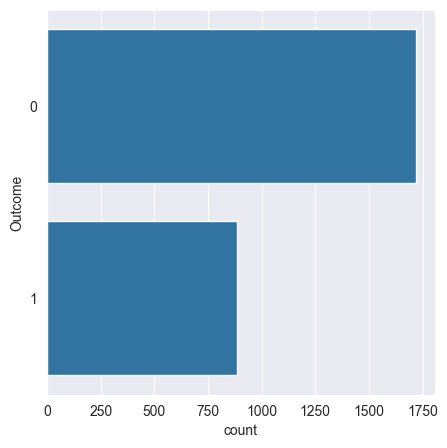

In [12]:
# Menganalisa Fitur Outcome

plt.figure(figsize=(5,5))
sns.countplot(df, y='Outcome')
plt.show()

In [13]:
outcome_df = df['Outcome'].value_counts().reset_index()
outcome_df.columns = ['Outcome', 'Jumlah']
outcome_df

,Outcome,Jumlah
0,0,1720
1,1,884


Data klasifikasi biner tidak seimbang pada fitur Outcome. Data tidak adanya diabetes (0) lebih banyak setengah dari data ada diabetes (1).

## Multivariate Analysis

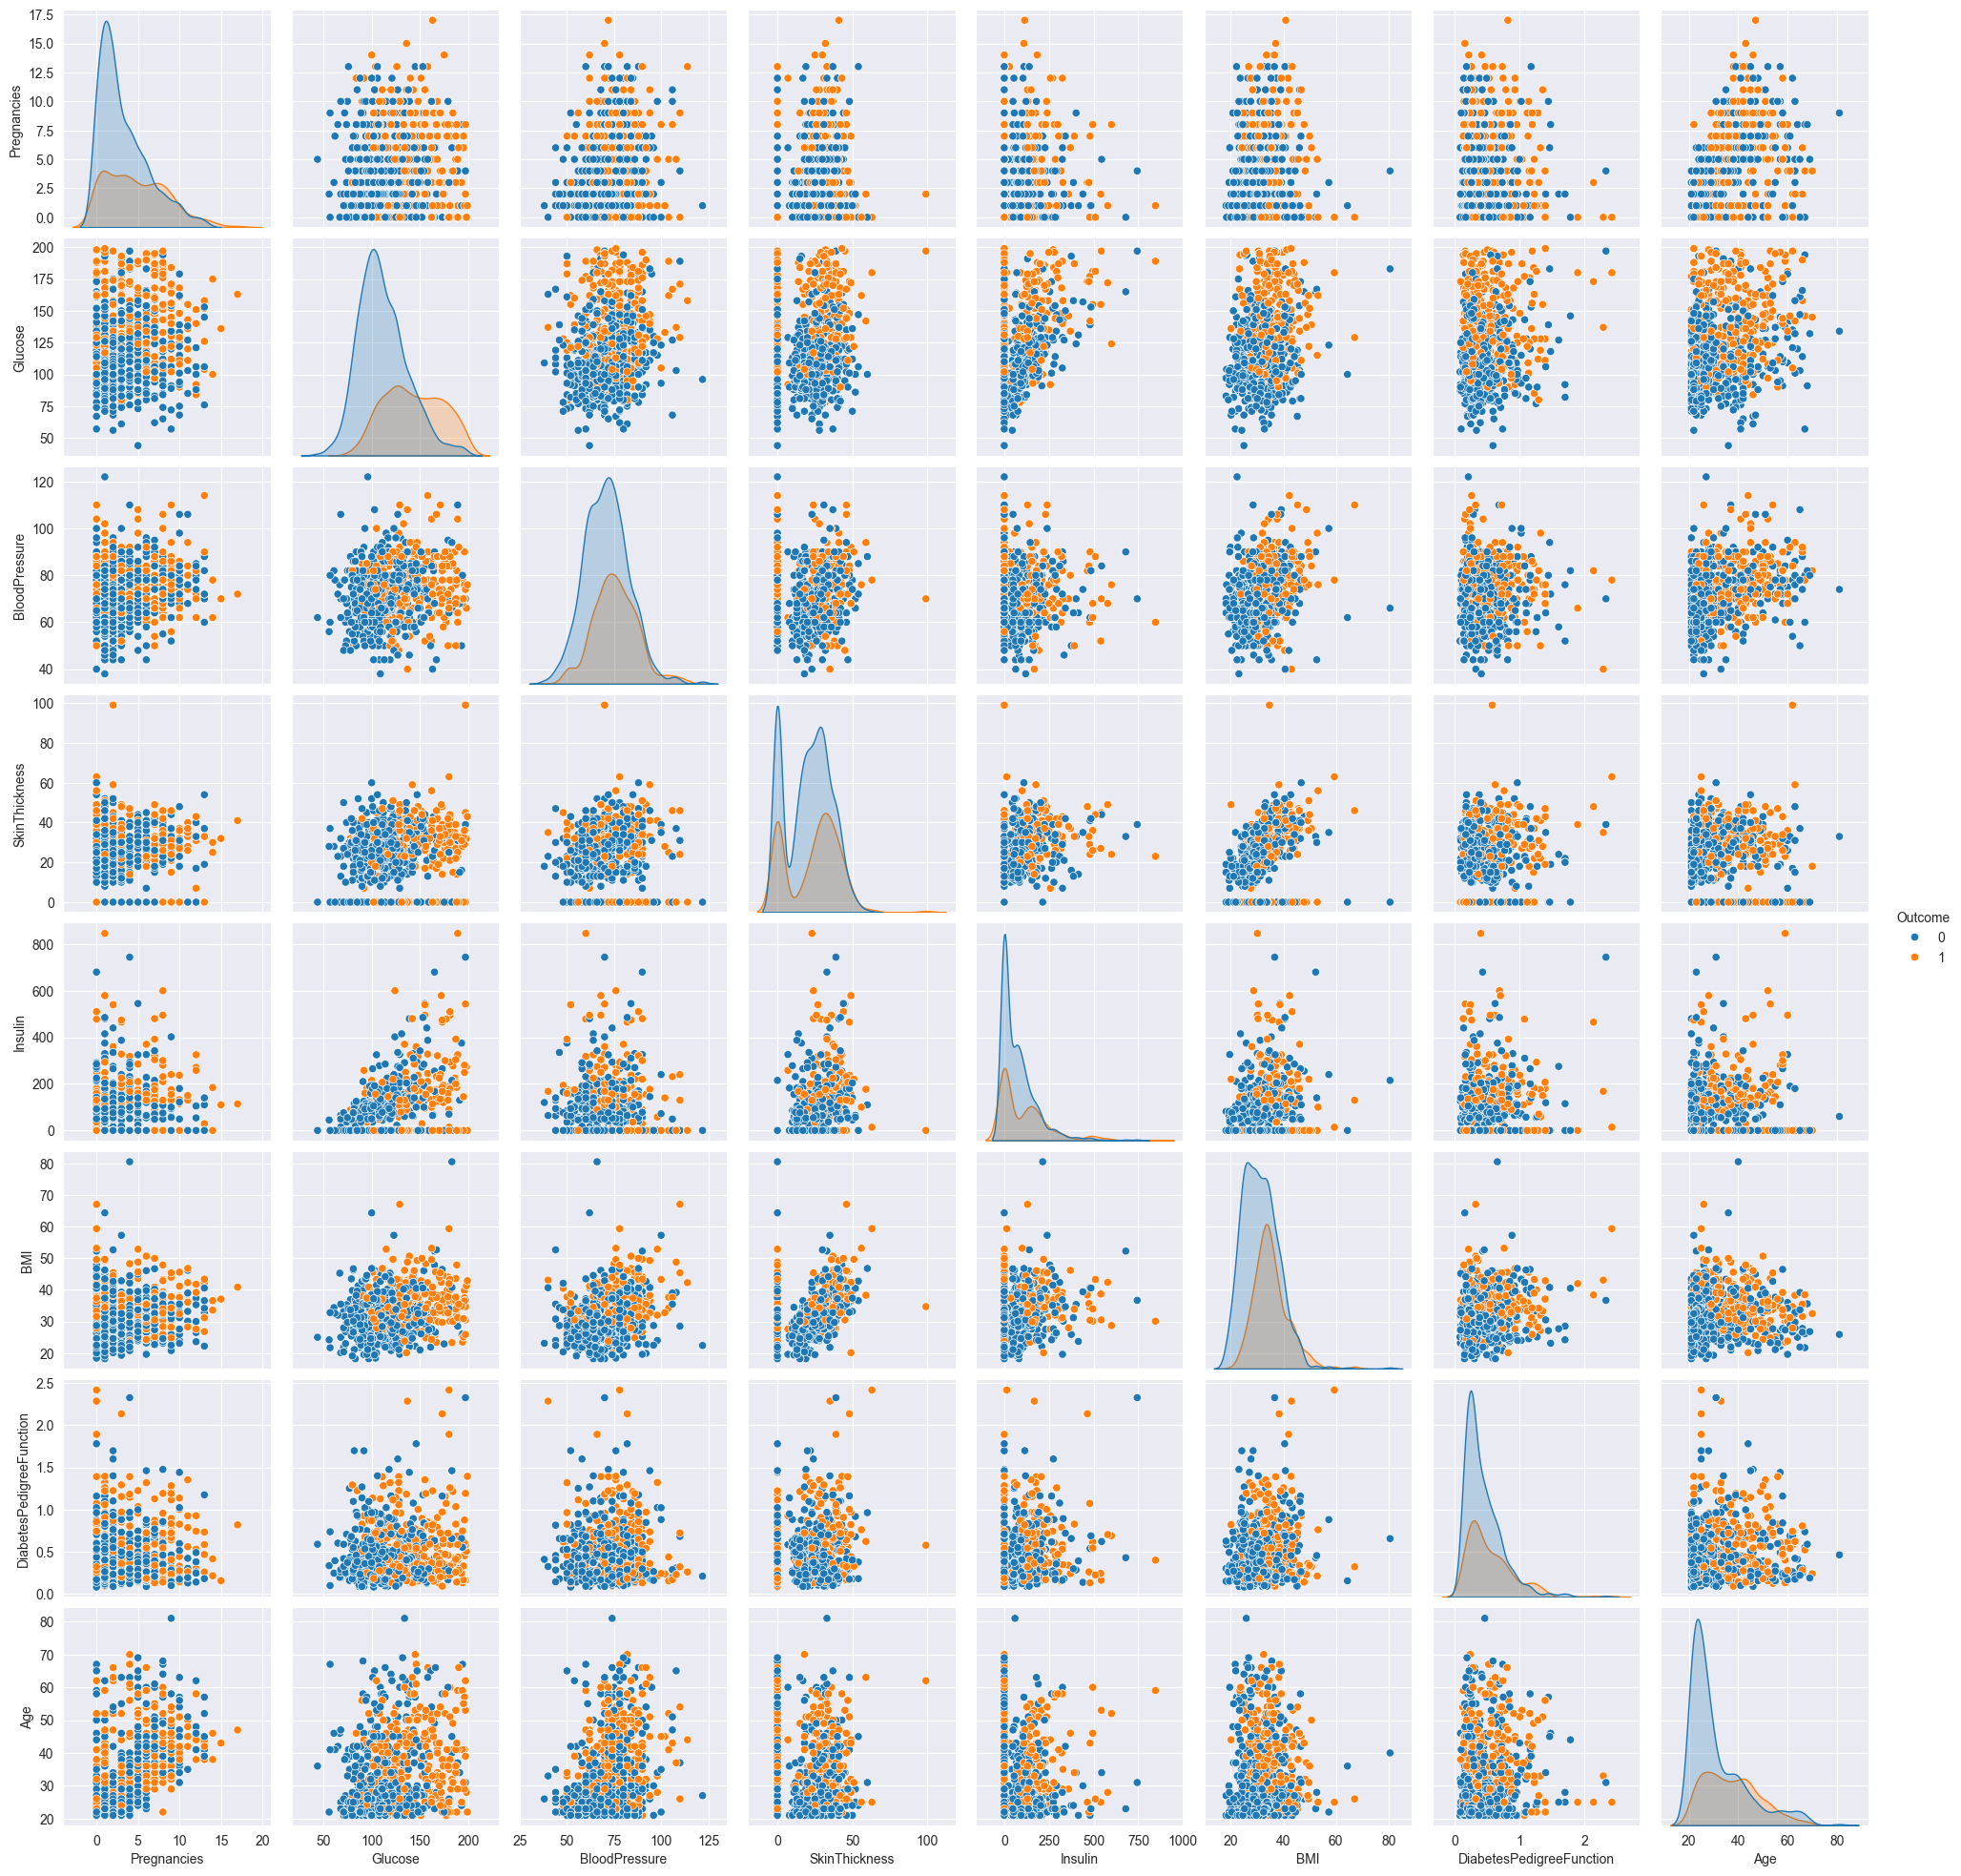

In [14]:
# Membuat pairplot untuk memetakan hubungan antar fitur

sns.pairplot(df, hue='Outcome')

Tidak terdapat informasi yang relevan untuk mengetahui hubungan antar fitur pada _pairplot_.

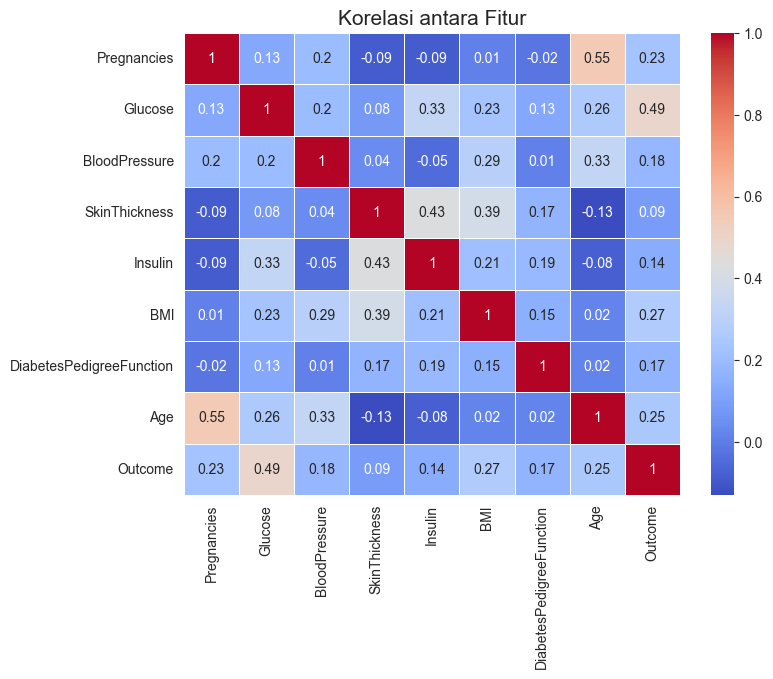

In [15]:
# Memetakan korelasi antar fitur menggunakan heatmap
korelasi = df.corr().round(2)

plt.figure(figsize=(8,6))
sns.heatmap(korelasi, annot=True, linewidths=0.5, cmap='coolwarm')
plt.title('Korelasi antara Fitur', fontsize=15)
plt.show()

Matriks korelasi menunjukkan adanya hubungan terkait dengan fitur yang ada. Fitur pada Glucose (0.49), BMI (0.27), Age (0.25), dan Pregnancies (0.23) terlihat mempunyai korelasi terhadap Outcome sebagai penentu ada atau tidaknya diabetes dibandingkan fitur lainnya. Sedangkan BloodPressure (0.18), DiabetesPedigreeFunction (0.17), dan Insulin (0.14) juga memiliki korelasi terhadap Outcome meskipun dengan nilai lebih kecil.  Sementara itu ada beberapa fitur menarik yang saling berkorelasi namun tidak memiliki korelasi tinggi pada fitur Outcome yaitu Age dan Pregnancies (0.55), Insulin dan SkinThickness (0.43), BMI dan SkinThickness (0.39), Age dan BloodPressure (0.33), Glucose dan Insulin (0.33), dst.

Dikarenakan model hanya akan memprediksi Outcome sebagai ada tidaknya diabetes, maka hanya fitur yang memliki korelasi signifikan yaitu Pregnancies, Glucose, Insulin, BMI, dan Age akan digunakan sebagai penentu prediksi model. Fitur yang memiliki tingkat korelasi terhadap Outcome akan dianalisa lebih lanjut.


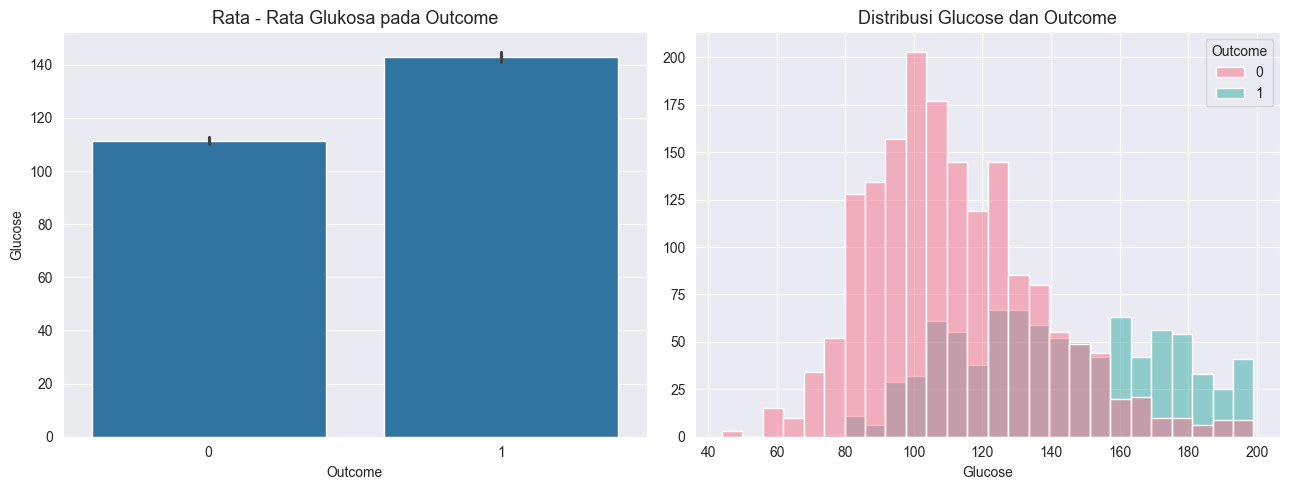

In [16]:
# Analisa hubungan Glucose dan Outcome menggunakan barplot dan histplot
plt.subplots(nrows=1, ncols=2, figsize=(13,5))

plt.subplot(1, 2, 1)
sns.barplot(df, x='Outcome', y='Glucose')
plt.title('Rata - Rata Glukosa pada Outcome', fontsize=13)

plt.subplot(1, 2, 2)
sns.histplot(df, x="Glucose", hue='Outcome', palette='husl')
plt.title('Distribusi Glucose dan Outcome', fontsize=13)
plt.ylabel('')

plt.tight_layout()
plt.show()

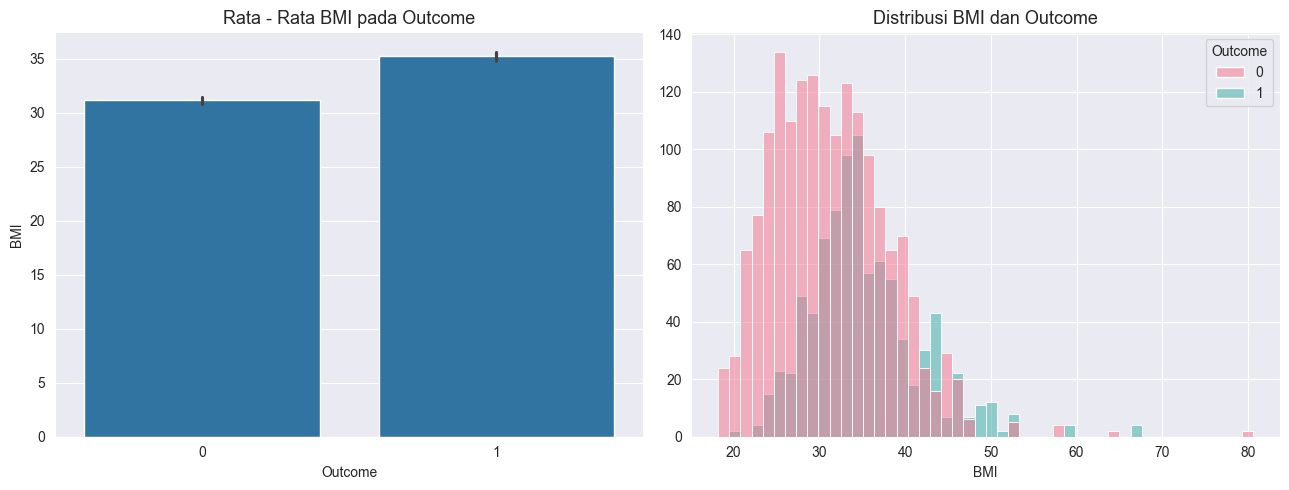

In [17]:
# Analisa hubungan BMI dan Outcome menggunakan barplot dan histplot
plt.subplots(nrows=1, ncols=2, figsize=(13,5))

plt.subplot(1, 2, 1)
sns.barplot(df, x='Outcome', y='BMI')
plt.title('Rata - Rata BMI pada Outcome', fontsize=13)

plt.subplot(1, 2, 2)
sns.histplot(df, x="BMI", hue='Outcome', palette='husl')
plt.title('Distribusi BMI dan Outcome', fontsize=13)
plt.ylabel('')

plt.tight_layout()
plt.show()

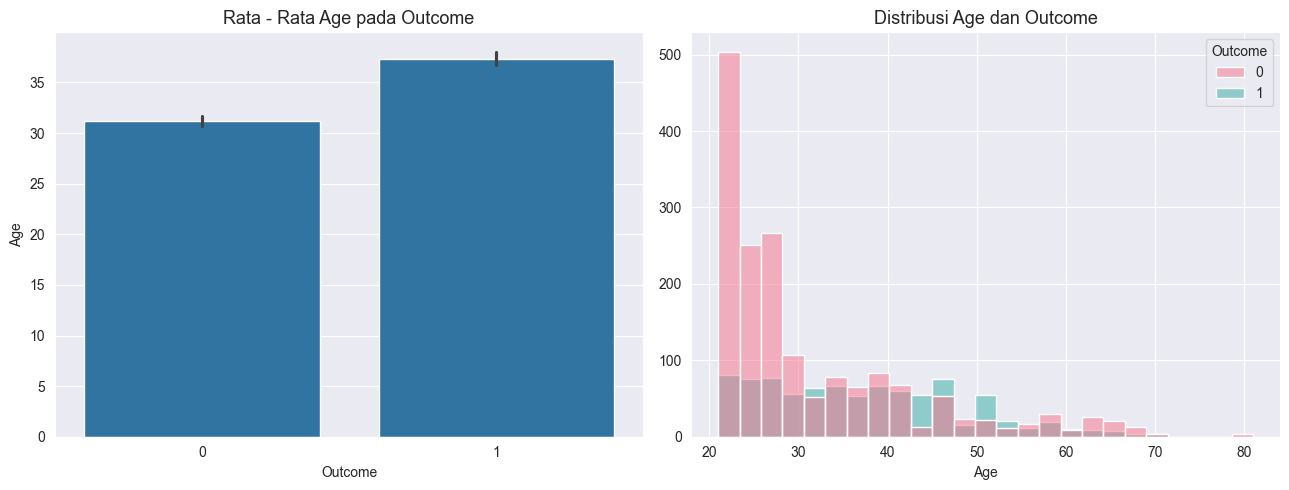

In [18]:
# Analisa hubungan Age dan Outcome menggunakan barplot dan histplot
plt.subplots(nrows=1, ncols=2, figsize=(13,5))

plt.subplot(1, 2, 1)
sns.barplot(df, x='Outcome', y='Age')
plt.title('Rata - Rata Age pada Outcome', fontsize=13)

plt.subplot(1, 2, 2)
sns.histplot(df, x="Age", hue='Outcome', palette='husl')
plt.title('Distribusi Age dan Outcome', fontsize=13)
plt.ylabel('')

plt.tight_layout()
plt.show()

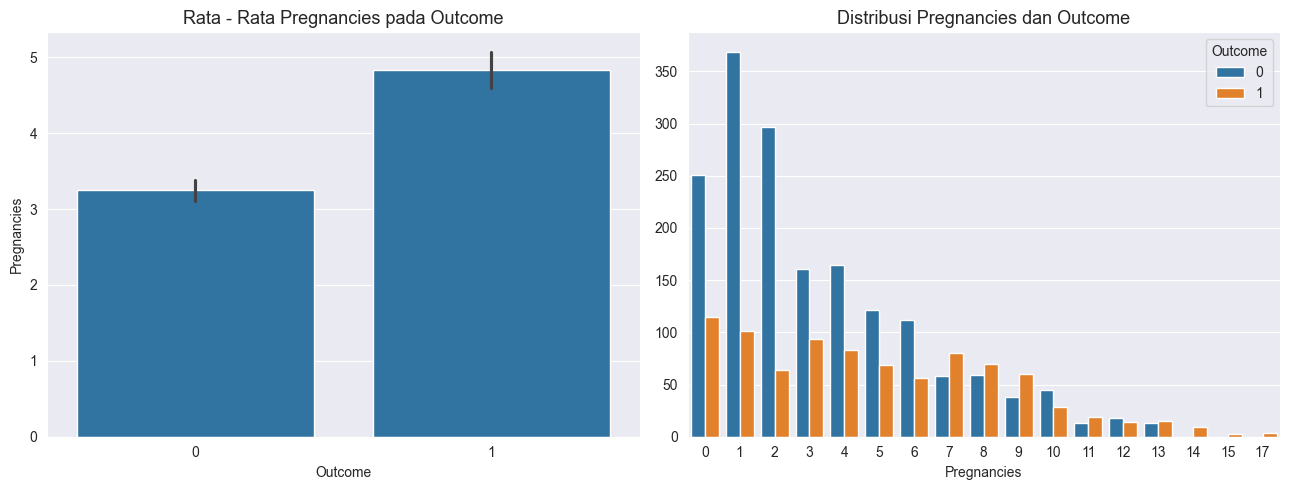

In [19]:
# Analisa hubungan Pregnancies dan Outcome menggunakan barplot dan countplot
plt.subplots(nrows=1, ncols=2, figsize=(13,5))

plt.subplot(1, 2, 1)
sns.barplot(df, x='Outcome', y='Pregnancies')
plt.title('Rata - Rata Pregnancies pada Outcome', fontsize=13)

plt.subplot(1, 2, 2)
sns.countplot(x='Pregnancies', hue ='Outcome', data=df)
plt.title('Distribusi Pregnancies dan Outcome', fontsize=13)
plt.ylabel('')

plt.tight_layout()
plt.show()


# Data Preparation

In [20]:
# Fitur pada data akan dipilah menyesuakan korelasi terhadap Outcome model
fitur_final = ['Pregnancies', 'Glucose', 'BMI', 'Age', 'Outcome']
fitur_numerik = [i for i in fitur_final if i != 'Outcome']
new_df = df[fitur_final]

new_df.head(5)

,Pregnancies,Glucose,BMI,Age,Outcome
0,6,148,33.6,50,1
1,1,85,26.6,31,0
2,8,183,23.3,32,1
3,1,89,28.1,21,0
4,0,137,43.1,33,1


In [21]:
X = new_df.copy().drop('Outcome', axis=1)
y = new_df['Outcome']

In [22]:
# Data akan dibagi menjadi 80% train dan 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(f'Total sampel pada dataset: {len(X)}')
print(f'Total sampel pada train dataset: {len(X_train)}')
print(f'Total sampel pada test dataset: {len(X_test)}')

Total sampel pada dataset: 2604
Total sampel pada train dataset: 2083
Total sampel pada test dataset: 521


In [23]:
# Standarisasi data menggunakan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

Dataset akan distandarisasi menggunakan _StandardScaler_ untuk mengubah nilai data menjadi distribusi normal dengan mean 0 dan standar deviasi 1. Hal ini dilakukan untuk membangun model dengan baik karena membuat skala data menjadi 0 dan 1.

In [24]:
X_train

array([[-1.13682075,  0.13901427, -0.24518405, -0.78295463],
       [-0.22675249, -0.29080617, -1.44745378, -0.95359491],
       [ 1.29002795, -1.24963636,  0.85568943,  0.49684748],
       ...,
       [ 2.20009621,  0.17207738,  0.95708567,  1.52068918],
       [-0.83346466,  1.95748533,  0.24731198,  0.41152734],
       [ 1.89674012, -0.35693239, -0.70870973,  0.58216763]])

# Model Development

## Logistic Regression

In [25]:
log_regres=LogisticRegression()
log_regres.fit(X_train, y_train)
log_gres_pred = log_regres.predict(X_test)

print(classification_report(y_test,log_gres_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       322
           1       0.73      0.60      0.66       199

    accuracy                           0.76       521
   macro avg       0.76      0.73      0.74       521
weighted avg       0.76      0.76      0.76       521



In [26]:
log_regres_acc = accuracy_score(y_test, log_gres_pred)

print(f"Akurasi : {log_regres_acc:.2f}")

Akurasi : 0.76


Akurasi model dengan menerapkan algoritma _Logistic Regression_ adalah 0.76. Untuk meningkatkan akurasi, akan dilakukan pencarian parameter terbaik dengan menggunakan _GridSearchCV_.

### Grid Search Logistic Regression

In [27]:
# Membuat dictionary untuk parameter yang akan di tune
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

grid_search_lr = GridSearchCV(log_regres, param_grid_lr, cv=5, scoring='accuracy', verbose=1)
grid_search_lr.fit(X_train, y_train)

best_params_lr = grid_search_lr.best_params_
print("Best Hyperparameters:", best_params_lr)

# Mengambil model dengan paramater terbaik
best_model_lr = grid_search_lr.best_estimator_

best_pred_lr = best_model_lr.predict(X_test)

# Menghitung nilai dari model terbaik
best_lr_acc = accuracy_score(y_test, best_pred_lr)
print(f"Best Model Accuracy: {best_lr_acc:.2f}")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Hyperparameters: {'C': 0.01, 'solver': 'newton-cg'}
Best Model Accuracy: 0.76


Sayangnya, model dengan _hyperparamter tuning_ terbaik tetap memiliki nilai akurasi yang sama.

## K-Nearest Neighbor

In [28]:
# Nilai K secara acak dipilih 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       322
           1       0.75      0.73      0.74       199

    accuracy                           0.80       521
   macro avg       0.79      0.79      0.79       521
weighted avg       0.80      0.80      0.80       521



In [29]:
knn_acc = accuracy_score(y_test, knn_pred)
print(f"Skor Akurasi : {knn_acc:.2f}")

Skor Akurasi : 0.80


Nilai K sembarang yaitu 5 dengan akurasi 0.80, memiliki performa yang kurang matang. Performa model K-NN dapat ditingkatkan dengan melakukan _hyperparameter tuning_ pada nilai K. Oleh karena itu, perlu dilakukan pencarian nilai K yang optimal. Salah satu metodenya ialah dengan menggunakan Metode _Elbow_.

### Metode Elbow

In [30]:
# Menghitung nilai optimal K dengan menggunakan metode elbow
error_rate = []
for i in range(1, 8):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_pred_elbow = knn.predict(X_test)
    accuracy = accuracy_score(y_test, knn_pred_elbow)
    print(f"Akurasi Pada K = {i} adalah {accuracy}")
    error_rate.append(np.mean(knn_pred_elbow != y_test))

Akurasi Pada K = 1 adalah 0.9904030710172744
Akurasi Pada K = 2 adalah 0.944337811900192
Akurasi Pada K = 3 adalah 0.9155470249520153
Akurasi Pada K = 4 adalah 0.8579654510556622
Akurasi Pada K = 5 adalah 0.8042226487523992
Akurasi Pada K = 6 adalah 0.7581573896353166
Akurasi Pada K = 7 adalah 0.7658349328214972


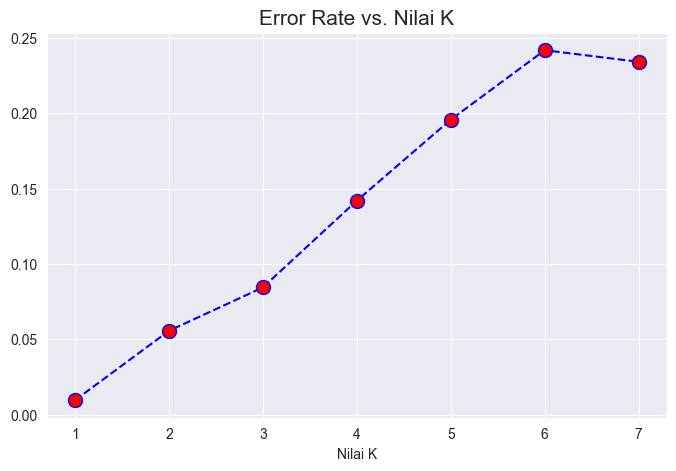

In [31]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 8), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. Nilai K', fontsize=15)
plt.xlabel('Nilai K')
plt.ylabel('')
plt.show()

In [32]:
# Memilih error rate terkecil
print("Minimum error:",min(error_rate)," pada K = ",error_rate.index(min(error_rate))+1)

Minimum error: 0.009596928982725527  pada K =  1


Ditemukan bahwa nilai K dengan error rate dan akurasi terbaik adalah 1

In [33]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       322
           1       0.98      0.99      0.99       199

    accuracy                           0.99       521
   macro avg       0.99      0.99      0.99       521
weighted avg       0.99      0.99      0.99       521



In [34]:
knn_acc = accuracy_score(y_test, knn_pred)
print(f"Skor Akurasi : {knn_acc:.2f}")

Skor Akurasi : 0.99


## Support Vector Machine

In [35]:
svm = SVC()
svm.fit(X_train,y_train)
svm_pred = svm.predict(X_test)

In [36]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       322
           1       0.78      0.62      0.69       199

    accuracy                           0.79       521
   macro avg       0.79      0.76      0.77       521
weighted avg       0.79      0.79      0.79       521



In [37]:
svm_acc = accuracy_score(y_test, svm_pred)
print(f"Skor Akurasi : {svm_acc:.2f}")

Skor Akurasi : 0.79


Dengan menggunakan algoritma _Support Vector Machine_, model memperoleh akurasi sebesar 0.79

### Grid Search SVM

In [38]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', verbose=1)
grid_search_svm.fit(X_train, y_train)

best_params_svm = grid_search_svm.best_params_
print("Best Hyperparameters:", best_params_svm)

# Get the best model
best_model_svm = grid_search_svm.best_estimator_

# Make predictions with the best model
best_pred_svm = best_model_svm.predict(X_test)

# Calculate accuracy with the best model
best_svm_acc = accuracy_score(y_test, best_pred_svm)
print(f"Best Model Accuracy: {best_svm_acc:.2f}")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Hyperparameters: {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
Best Model Accuracy: 0.98


In [39]:
svm_pred = best_model_svm.predict(X_test)

In [40]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       322
           1       0.97      0.97      0.97       199

    accuracy                           0.98       521
   macro avg       0.98      0.98      0.98       521
weighted avg       0.98      0.98      0.98       521



Akurasi untuk model algoritma SVM telah naik dari 0.79 menjadi 0.98 setelah mendapatkan _hyperparameter_ yang optimal

## Random Forest

In [41]:
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [42]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       322
           1       0.98      0.99      0.99       199

    accuracy                           0.99       521
   macro avg       0.99      0.99      0.99       521
weighted avg       0.99      0.99      0.99       521



In [43]:
rf_acc = accuracy_score(y_test, rf_pred)
print(f"Skor Akurasi : {rf_acc:.2f}")

Skor Akurasi : 0.99


Algoritma _Random Forest_ menghasilkan skor akurasi sebesar 0.99.

## XGBoost Algorithm

In [44]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [45]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [46]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       322
           1       0.98      0.99      0.99       199

    accuracy                           0.99       521
   macro avg       0.99      0.99      0.99       521
weighted avg       0.99      0.99      0.99       521



In [47]:
xgb_acc = accuracy_score(y_test, xgb_pred)
print(f"Skor Akurasi : {xgb_acc:.2f}")

Skor Akurasi : 0.99


Dengan menggunkana Algoritma _XGBoost_, model memperoleh akurasi sebesar 0.99

# Evaluasi Model

## Confusion Matrix

In [48]:
models_pred = {
    'Logistic Regression': log_gres_pred,
    'KNN': knn_pred,
    'SVM': svm_pred,
    'RandomForest': rf_pred,
    'XGBoost': xgb_pred
}

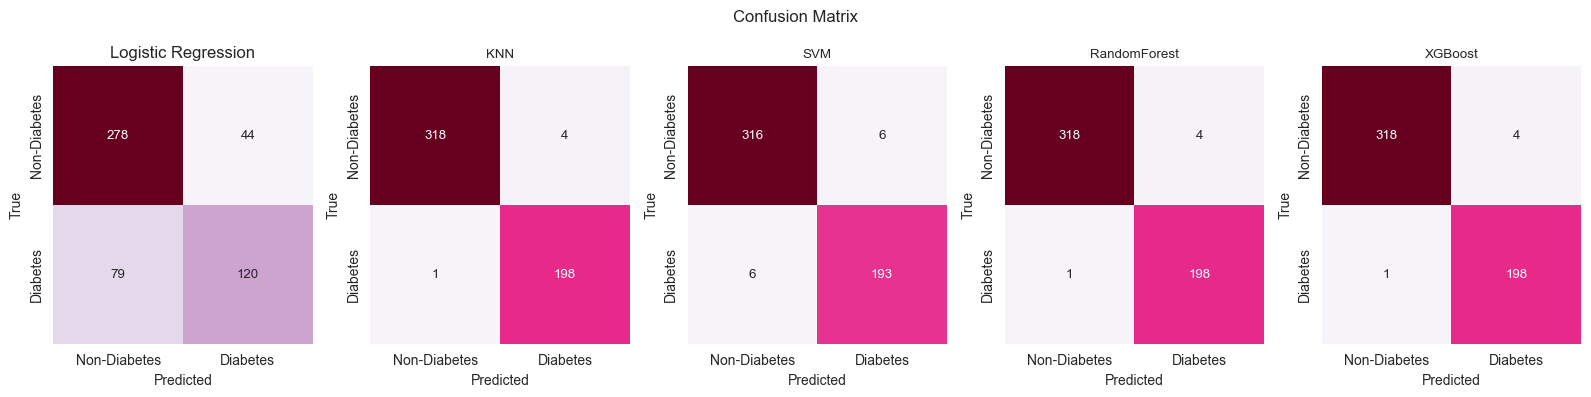

In [49]:
fig, axes = plt.subplots(1, len(models_pred), figsize=(16, 4))
fig.suptitle('Confusion Matrix')

for idx, (model_name, model_pred) in enumerate(models_pred.items()):
    cm = confusion_matrix(y_test, model_pred)
    ax = axes[idx]
    ax.set_title(model_name)
    sns.set(font_scale=0.8)

    sns.heatmap(cm, annot=True, cmap='PuRd', cbar=False, fmt='d',
                xticklabels=['Non-Diabetes', 'Diabetes'],
                yticklabels=['Non-Diabetes', 'Diabetes'],
                ax=ax)

    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()

## Tabel Evaluasi Model

In [50]:
algorithms = ['Logistic Regression', 'K-Nearest Neighbor', 'SVM', 'Random Forest', 'XGBoost']
y_preds = [log_gres_pred, knn_pred, svm_pred, rf_pred, xgb_pred]

eval = []

for model, y_pred in zip(algorithms, y_preds):
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    precision = round(precision_score(y_test, y_pred) * 100, 2)
    recall = round(recall_score(y_test, y_pred) * 100, 2)
    f1 = round(f1_score(y_test, y_pred) * 100, 2)
    eval.append([accuracy, precision, recall, f1])

eval = pd.DataFrame(eval, columns=['Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1 Score (%)'], index=algorithms)
eval

,Accuracy (%),Precision (%),Recall (%),F1 Score (%)
Logistic Regression,76.39,73.17,60.30,66.12
K-Nearest Neighbor,99.04,98.02,99.50,98.75
SVM,97.70,96.98,96.98,96.98
Random Forest,99.04,98.02,99.50,98.75
XGBoost,99.04,98.02,99.50,98.75


Hasil evaluasi diatas menunjukkan bahwa ada tiga algoritma yang memiliki tingkat performa teratas yaitu KNN, Random Forest, dan XGBoost. Ketiganya sama-sama menghasilkan performa terbaik yang sebagai acuan adalah nilai accuracy, precision, dan recall, dari lima algoritma yang dijadikan model. Disusul oleh algoritma SVM yang memiliki nilai performa yang sangat baik. Terakhir, algoritma Logistic Regression memperoleh nilai performa yang kurang baik.

# Kesimpulan

Dari hasil penilitan yang telah dilakukan, dapat diambil kesimpulan bahwa 4 dari 5 algoritma yang dijadikan model untuk mendeteksi penyakit diabetes dengan menggunakan dataset diatas menghasilkan performa yang sangat baik. Algoritma yang dijadikan perbandingan ialah Logistic Regression, K-Nearest Neighbor, Support Vector Machine, Random Forest, dan Extreme Gradient Boost. Kelima algoritma dibandingkan dengan menghitung nilai accuracy, precision, recall, F1 score. Terdapat tiga algoritma dengan hasil yang sama-sama terbaik dengan diatas 98% yaitu KNN, Random Forest, dan XGBoost baik pada Accuract maupun F1 score. Kemudian SVM dengan hasil diatas 96%. Terakhir, algoritma dengan performa hasil yang kurang memuaskan ialah Logistic Regression dengan hasil nilai Accuracy 76% dan nilai F1 score 66%.

# Penutup

Model dengan berbagai algoritma telah berhasil diuji untuk mendeteksi penyakit diabetes. Empat dari Lima algoritma menghasilkan performa yang sangat baik dalam memprediksi diabetes.